In [1]:
from utils import *
from fastai.vision.widgets import *


In [2]:
key = '53a7666401884f8e82f78e4a7c691cdc'

In [3]:
search_images_bing

<function utils.search_images_bing(key, term, min_sz=128)>

In [4]:
# search_images_bing??

In [5]:
results = search_images_bing(key, 'dog')
ims = results.attrgot('content_url')
len(ims)
ims[0]

'https://upload.wikimedia.org/wikipedia/commons/3/34/Jumping_dog_Ryder.jpg'

In [6]:
# Path??

In [7]:
dog_types = 'teckel','bulldog','poodle'
path = Path('dog')

In [8]:
if not path.exists():
    path.mkdir()
    for o in dog_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{o} dog')
        download_images(dest, urls=results.attrgot('content_url'))

In [9]:
fns = get_image_files(path)
fns

(#426) [Path('dog/bulldog/00000000.jpg'),Path('dog/bulldog/00000001.jpg'),Path('dog/bulldog/00000002.jpg'),Path('dog/bulldog/00000003.jpg'),Path('dog/bulldog/00000004.jpg'),Path('dog/bulldog/00000005.jpg'),Path('dog/bulldog/00000006.jpg'),Path('dog/bulldog/00000007.jpg'),Path('dog/bulldog/00000008.jpg'),Path('dog/bulldog/00000009.jpg')...]

In [10]:
failed = verify_images(fns)
failed



(#0) []

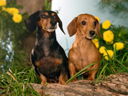

In [11]:

im = Image.open('dog/teckel/00000002.jpg')
im.to_thumb(128,128)


In [12]:
failed.map(Path.unlink);

In [13]:
dogs = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))



In [14]:
dls = dogs.dataloaders(path)

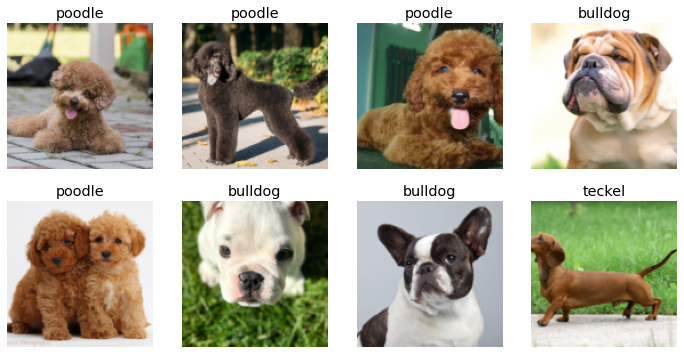

In [15]:
dls.valid.show_batch(max_n=8, nrows=2)

In [16]:
# dogs = dogs.new(item_tfms=Resize(128, ResizeMethod.Squish))
# dls = dogs.dataloaders(path)
# dls.valid.show_batch(max_n=4, nrows=1)

In [17]:
# dogs = dogs.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
# dls = dogs.dataloaders(path)
# dls.valid.show_batch(max_n=4, nrows=1)

In [18]:
# dogs = dogs.new(item_tfms=RandomResizedCrop(128, min_scale=0.6))
# dls = dogs.dataloaders(path)
# dls.valid.show_batch(max_n=4, nrows=1, unique=True)

In [19]:
# dogs = dogs.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
# dls = dogs.dataloaders(path)
# dls.train.show_batch(max_n=4, nrows=1, unique=True)

In [20]:
# dogs = dogs.new(item_tfms=RandomResizedCrop(128, min_scale=0.001))
# dls = dogs.dataloaders(path)
# dls.train.show_batch(max_n=4, nrows=1, unique=True)

In [21]:
# dogs = dogs.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
# dls = dogs.dataloaders(path)
# dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [29]:
dogs = dogs.new(
    item_tfms=RandomResizedCrop(128, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = dogs.dataloaders(path)
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,1.541302,0.107228,0.035294,00:07


epoch,train_loss,valid_loss,error_rate,time
0,0.517223,0.027509,0.011765,00:07
1,0.343846,0.008877,0.000000,00:07
2,0.264056,0.016243,0.000000,00:07


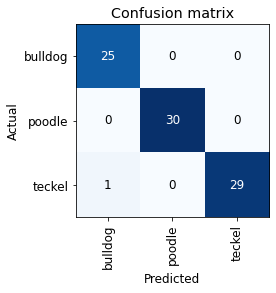

In [23]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

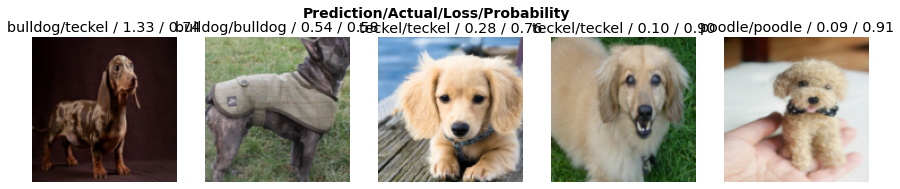

In [24]:
interp.plot_top_losses(5, nrows=1)

In [25]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [26]:
# for idx in cleaner.delete(): cleaner.fns[idx].unlink()
# for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [30]:
learn.export()

In [32]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [33]:
learn_inf = load_learner(path/'export.pkl')
learn_inf.dls.vocab

(#3) ['bulldog','poodle','teckel']

In [34]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [42]:
img = PILImage.create(btn_upload.data[-1])

In [37]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [38]:
pred,pred_idx,probs = learn_inf.predict(img)

In [39]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: teckel; Probability: 0.9894')

In [40]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [41]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [43]:
btn_upload = widgets.FileUpload()

In [44]:
VBox([widgets.Label('Select your dog!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

In [45]:
# !pip install voila
# !jupyter serverextension enable voila —sys-prefix

     |████████████████████████████████| 5.9 MB 139 kB/s eta 0:00:01
     |████████████████████████████████| 183 kB 455 kB/s eta 0:00:01
Enabling: voila
- Writing config: /root/.jupyter
    - Validating...
      voila 0.1.23 OK
Enabling: —sys-prefix
- Writing config: /root/.jupyter
    - Validating...
Error loading server extension —sys-prefix
      X is —sys-prefix importable?
